In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [77]:
%matplotlib inline  
pd.set_option('display.max_columns', None)


In [7]:
train = pd.read_csv("../data/Train.csv")
test = pd.read_csv("../data/Test.csv")

In [14]:
train.describe(include='all')

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
count,21201,21201,21201,21201.000000,21201,21201.000000,21201.000000,21201,21201.000000,21201.000000,21201,21201.000000,21201.000000,21201,21201.000000,21201.000000,21201,21201.000000,21201.000000,21201,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201,21201.000000
unique,21201,3186,1,NaN,2,NaN,NaN,15686,NaN,NaN,15742,NaN,NaN,15767,NaN,NaN,15690,NaN,NaN,15725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,924,NaN
top,Order_No_23597,User_Id_393,Bike,NaN,Business,NaN,NaN,2:24:11 PM,NaN,NaN,9:56:52 AM,NaN,NaN,2:42:41 PM,NaN,NaN,10:53:20 AM,NaN,NaN,3:24:03 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rider_Id_726,NaN
freq,1,645,21201,NaN,17384,NaN,NaN,6,NaN,NaN,6,NaN,NaN,6,NaN,NaN,6,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247,NaN
mean,NaN,NaN,NaN,2.752182,NaN,15.653696,3.240083,NaN,15.653837,3.240225,NaN,15.653837,3.240225,NaN,15.653837,3.240225,NaN,15.653837,3.240225,NaN,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,NaN,1556.920947
std,NaN,NaN,NaN,0.625178,NaN,8.798916,1.567295,NaN,8.798886,1.567228,NaN,8.798886,1.567228,NaN,8.798886,1.567228,NaN,8.798886,1.567228,NaN,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,NaN,987.270788
min,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,NaN,1.000000
25%,NaN,NaN,NaN,3.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,NaN,882.000000
50%,NaN,NaN,NaN,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,NaN,1369.000000
75%,NaN,NaN,NaN,3.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,NaN,2040.000000


In [31]:
test.describe(include='all')

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
count,7068,7068,7068,7068.000000,7068,7068.000000,7068.000000,7068,7068.000000,7068.000000,7068,7068.000000,7068.000000,7068,7068.000000,7068.000000,7068,7068.000000,5631.000000,199.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068
unique,7068,1617,1,NaN,2,NaN,NaN,6336,NaN,NaN,6388,NaN,NaN,6374,NaN,NaN,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,822
top,Order_No_19561,User_Id_393,Bike,NaN,Business,NaN,NaN,11:25:46 AM,NaN,NaN,12:35:17 PM,NaN,NaN,10:21:01 AM,NaN,NaN,3:03:19 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rider_Id_726
freq,1,206,7068,NaN,5780,NaN,NaN,4,NaN,NaN,5,NaN,NaN,3,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
mean,NaN,NaN,NaN,2.752122,NaN,15.621817,3.249859,NaN,15.621817,3.249859,NaN,15.621817,3.249859,NaN,15.621817,3.249859,NaN,9.458970,23.246120,6.651759,-1.282043,36.811148,-1.282255,36.811326,NaN
std,NaN,NaN,NaN,0.624000,NaN,8.776650,1.580926,NaN,8.776650,1.580926,NaN,8.776650,1.580926,NaN,8.776650,1.580926,NaN,5.575689,3.591161,14.085439,0.030044,0.037962,0.034236,0.043507,NaN
min,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,13.200000,0.100000,-1.433512,36.653828,-1.422652,36.639195,NaN
25%,NaN,NaN,NaN,3.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,5.000000,20.600000,1.100000,-1.301201,36.784605,-1.300921,36.786546,NaN
50%,NaN,NaN,NaN,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,8.000000,23.400000,2.900000,-1.281301,36.807219,-1.283219,36.807927,NaN
75%,NaN,NaN,NaN,3.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,13.000000,25.900000,4.950000,-1.257274,36.829716,-1.261256,36.828195,NaN


quick Insights:
- A quick look at the counts shows that the only columns with missing data are 'Precipitation in millimeters' and 'Temperature'.
- Platform Type is a categorical variable that has been parsed as an int
- There is a user who has ordered more than 800 deliveries?! this is interesting.. Maybe high ordering customers can bias the system towards certain routes or paths? might be worth further investigation
- There is obvious need for better treatment of the time variables.

In [33]:
for time_column in ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time', 'Arrival at Destination - Time']:
    train.loc[:, time_column] = pd.to_datetime(train.loc[:, time_column])
for time_column in ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time']:
    test.loc[:, time_column] = pd.to_datetime(test.loc[:, time_column])

In [30]:
label_sanity_check = train.apply(lambda x: (x['Arrival at Destination - Time'] - x['Pickup - Time']).seconds - x['Time from Pickup to Arrival'], axis=1)
if label_sanity_check.max() == label_sanity_check.min() == 0:
    print("Time has indeed been calculated correctly")
del label_sanity_check

Time has indeed been calculated correctly


In [37]:
date_sanity_check = (train['Arrival at Destination - Weekday (Mo = 1)'] - train['Pickup - Weekday (Mo = 1)'])
if date_sanity_check.max() == date_sanity_check.min() == 0:
    print("Deliveries always happen in the same day")
del date_sanity_check

Deliveries always happen in the same day


In [59]:
pd.Series.plot?

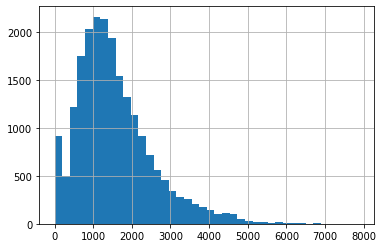

In [61]:
train['Time from Pickup to Arrival'].hist(bins = 40)

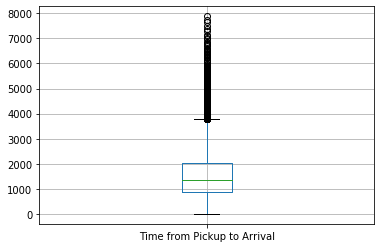

In [51]:
train.boxplot(column=['Time from Pickup to Arrival'])

In [55]:
train.loc[:, ['Time from Pickup to Arrival', 'Distance (KM)']].corr()

,Time from Pickup to Arrival,Distance (KM)
Time from Pickup to Arrival,1.000000,0.580608
Distance (KM),0.580608,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcb85b2810>,
      dtype=object)

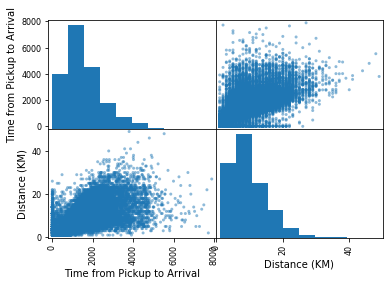

In [57]:
pd.plotting.scatter_matrix(train.loc[:, ['Time from Pickup to Arrival', 'Distance (KM)']])

Text(0.5, 1.0, 'Heatmap of train features')

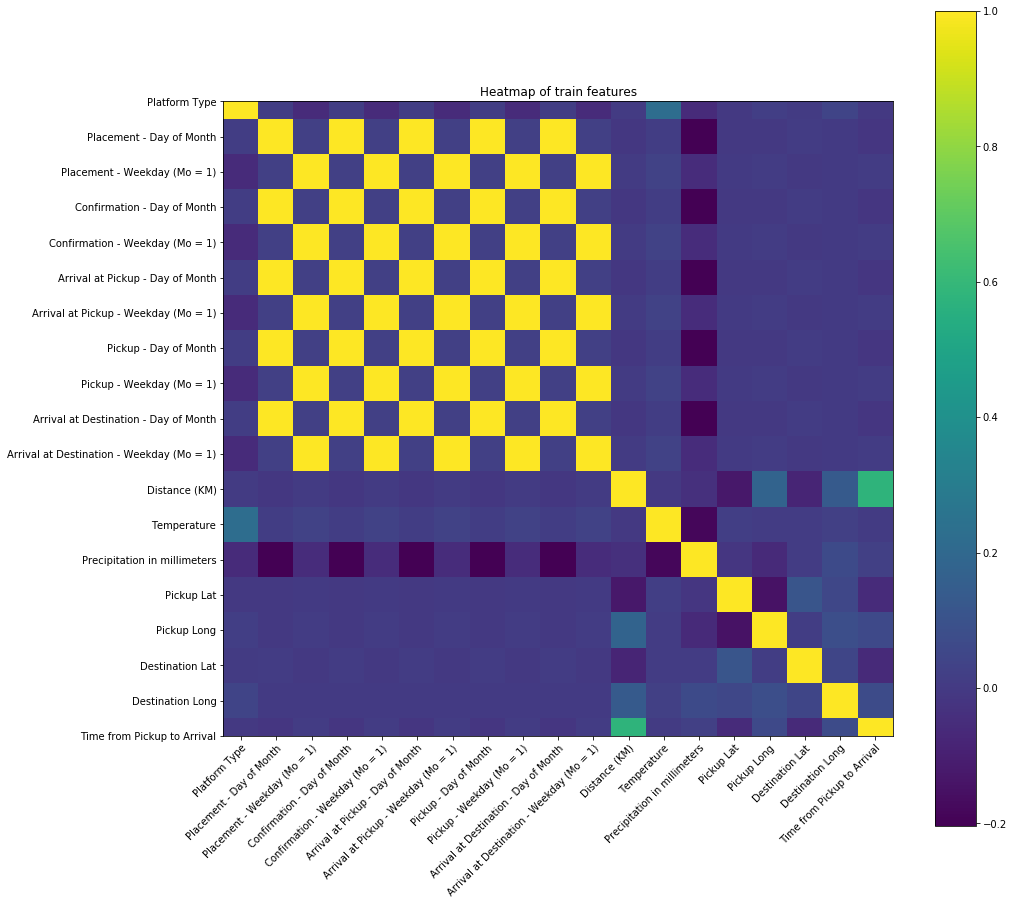

In [98]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(15, 15))
heatmap = ax.imshow(corr)
plt.colorbar(heatmap)
# We want to show all ticks...
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# # Loop over data dimensions and create text annotations.
# for i in range(len(corr.columns)):
#     for j in range(len(corr.columns)):
#         text = ax.text(j, i, corr[i, j],
#                        ha="center", va="center", color="w")

ax.set_title("Heatmap of train features")


In [99]:
corr

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
Platform Type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.005528,0.225060,-0.055948,-0.002742,0.021327,0.006319,0.043924,-0.003827
Placement - Day of Month,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,0.013097,-0.204143,-0.004929,-0.005453,0.007541,0.002077,-0.014710
Placement - Weekday (Mo = 1),-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,0.031064,-0.050592,-0.000918,0.011008,-0.004299,-0.000875,0.009693
Confirmation - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Confirmation - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Arrival at Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Arrival at Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Arrival at Destination - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
